In [1]:
#          #####################################################################################
#          #                                  IN THE NAME OF ALLAH                             #
#          # DYNAMIC ANALYSIS OF INELASTIC SPRING WITH INTIAL VELOCITY AND TWO SEISMIC LOADING #
#          #-----------------------------------------------------------------------------------#
#          #              THIS PROGRAM WRITTEN BY SALAR DELAVAR GHASHGHAEI (QASHQAI)           #
#          #                       EMAIL: salar.d.ghashghaei@gmail.com                         #
#          #####################################################################################

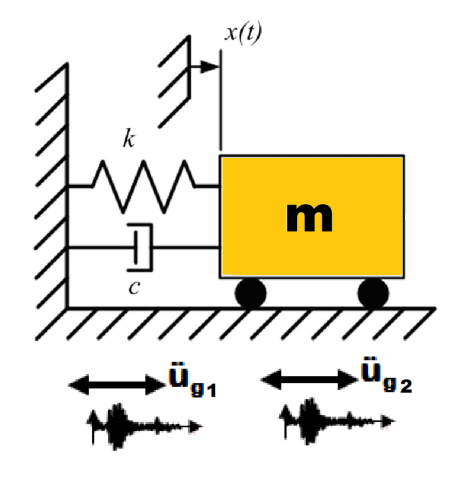

In [2]:
# Load the image
def PLOT_IMAGE(image):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    image = mpimg.imread(image_path)

    # Display the image
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
    
image_path = 'OPENSEES_SPRING_SEISMIC.png'    
PLOT_IMAGE(image_path)

In [6]:
# ---------------------

"""
When OK equals -1, it generally indicates that the command or operation was not executed
because it was already in progress or had already been completed. This can happen if you
try to run a command that is already running or has been completed in a previous step.

When OK equals -2, it typically indicates that the command or operation was not executed
because it was not recognized or not implemented. This could mean that the command
is either misspelled, not available in the current version of OpenSees, or not applicable to the current context.

When OK equals -3, it typically means that the command or operation failed.
This could be due to various reasons, such as incorrect input parameters,
syntax errors, or issues with the model setup.
"""
def ANALYSIS(OK, INCREMENT, TOLERANCE, MAX_ITERAIONS):
    import openseespy.opensees as op
    test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 4: 'RelativeNormUnbalance',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 4: 'RaphsonNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}

    for i in test:
        for j in algorithm:
            if OK != 0:
                if j < 4:
                    op.algorithm(algorithm[j], '-initial')

                else:
                    op.algorithm(algorithm[j])

                op.test(test[i], TOLERANCE, MAX_ITERAIONS) 
                OK = op.analyze(INCREMENT)                            
                print(test[i], algorithm[j], OK)             
                if OK == 0:
                    break
            else:
                continue
                
# ---------------------------- 

def PLOT_2D(X1, Y1, X2, Y2, XLABEL, YLABEL, TITLE):
    plt.figure(figsize=(10, 6))
    plt.plot(X1, Y1, label='Undamped', color='black')
    plt.plot(X2, Y2, label='Damped', color='grey', linestyle='--')
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    plt.title(TITLE)
    plt.grid(True)
    #plt.semilogy()
    plt.legend()
    plt.show()
    
# ----------------------------

def PLOT_SPRING(X1, Y1, XLABEL, YLABEL, TITLE):
    plt.figure(figsize=(8, 6))
    plt.plot(X1, Y1, color='black')
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    plt.title(TITLE)
    plt.grid(True)
    #plt.semilogy()
    plt.show()  
        
# ----------------------------

def plot_chart(time_damped, base_reaction_damped, displacement_damped, velocity_damped, acceleration_damped, omega_damped,
               time_undamped, base_reaction_undamped, displacement_undamped, velocity_undamped, acceleration_undamped, omega_undamped):
    fig, axs = plt.subplots(5, 1, figsize=(10, 12))

    # Plot base reaction
    axs[0].plot(time_damped, base_reaction_damped, label='Damped', color='blue')
    axs[0].plot(time_undamped, base_reaction_undamped, label='Undamped', color='cyan', linestyle='--')
    axs[0].set_title(f'Base Reaction vs Time - Damped Max Abs: {np.max(np.abs(base_reaction_damped)):.5f}, Undamped Max Abs: {np.max(np.abs(base_reaction_undamped)):.5f}')
    axs[0].set_xlabel('Time [s]')
    axs[0].set_ylabel('Base Reaction [N]')
    axs[0].grid(True)
    axs[0].legend()

    # Plot displacement
    axs[1].plot(time_damped, displacement_damped, label='Damped', color='red')
    axs[1].plot(time_undamped, displacement_undamped, label='Undamped', color='orange', linestyle='--')
    axs[1].set_title(f'Displacement vs Time - Damped Max Abs: {np.max(np.abs(displacement_damped)):.5f}, Undamped Max Abs: {np.max(np.abs(displacement_undamped)):.5f}')
    axs[1].set_xlabel('Time [s]')
    axs[1].set_ylabel('Displacement [m]')
    axs[1].grid(True)
    axs[1].legend()

    # Plot velocity
    axs[2].plot(time_damped, velocity_damped, label='Damped', color='green')
    axs[2].plot(time_undamped, velocity_undamped, label='Undamped', color='lime', linestyle='--')
    axs[2].set_title(f'Velocity vs Time - Damped Max Abs: {np.max(np.abs(velocity_damped)):.5f}, Undamped Max Abs: {np.max(np.abs(velocity_undamped)):.5f}')
    axs[2].set_xlabel('Time [s]')
    axs[2].set_ylabel('Velocity [m/s]')
    axs[2].grid(True)
    axs[2].legend()

    # Plot acceleration
    axs[3].plot(time_damped, acceleration_damped, label='Damped', color='purple')
    axs[3].plot(time_undamped, acceleration_undamped, label='Undamped', color='magenta', linestyle='--')
    axs[3].set_title(f'Acceleration vs Time - Damped Max Abs: {np.max(np.abs(acceleration_damped)):.5f}, Undamped Max Abs: {np.max(np.abs(acceleration_undamped)):.5f}')
    axs[3].set_xlabel('Time [s]')
    axs[3].set_ylabel('Acceleration [m/s²]')
    axs[3].grid(True)
    axs[3].legend()

    # Plot frequncy
    axs[4].plot(time_damped, omega_damped, label='Damped', color='brown')
    axs[4].plot(time_undamped, omega_undamped, label='Undamped', color='grey', linestyle='--')
    axs[4].set_title(f'Natural Fequncy vs Time - Damped Max Abs: {np.max(np.abs(omega_damped)):.5f}, Undamped Max Abs: {np.max(np.abs(omega_undamped)):.5f}')
    axs[4].set_xlabel('Time [s]')
    axs[4].set_ylabel('Natural Frequncy [Hertz]')
    axs[4].grid(True)
    axs[4].legend()

    plt.tight_layout()
    plt.show()    


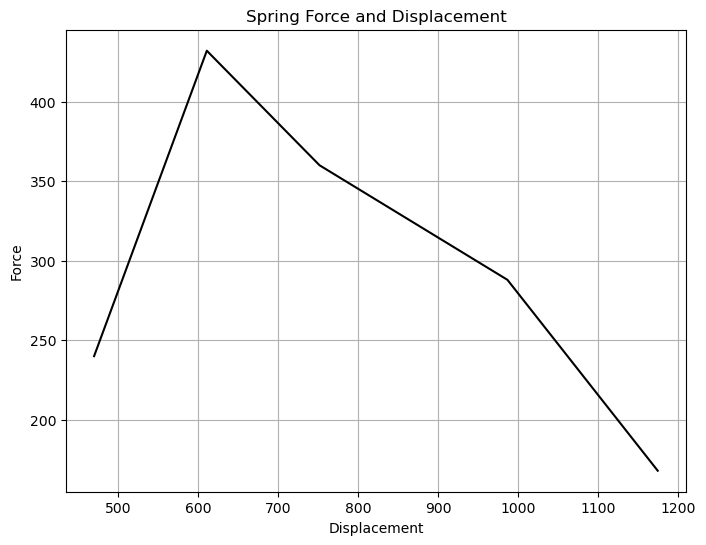

C:\Users\Dell\AppData\Local\Temp\ipykernel_7664\1895534712.py:79: RuntimeWarning: invalid value encountered in sqrt
  omega =  np.sqrt(KE / m) # Calculate angular frequency (omega)


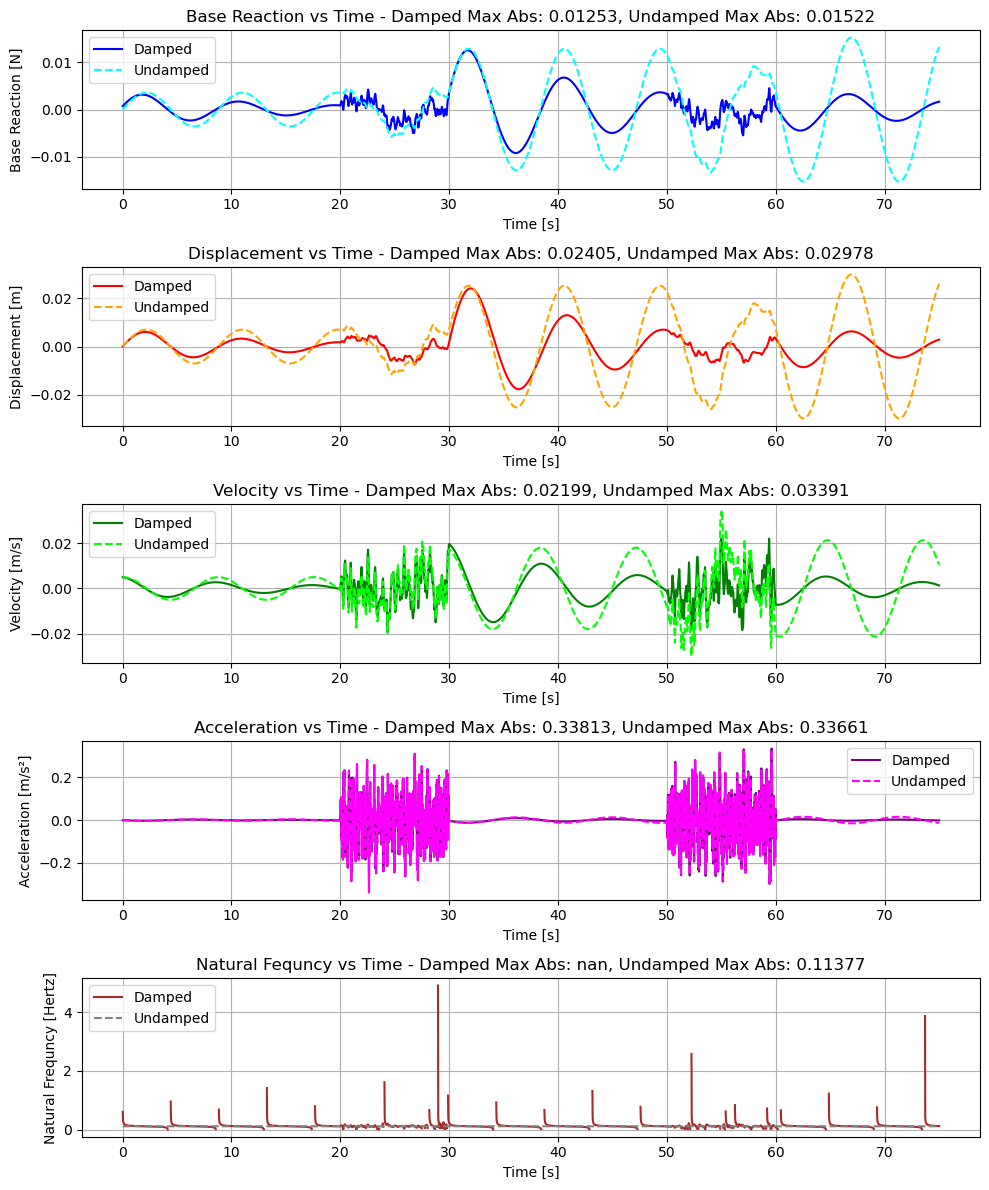

In [16]:
import openseespy.opensees as ops
import matplotlib.pyplot as plt
import numpy as np

def run_analysis(m, k, Fy, zeta, dt, Tfinal, iv0, damped=True):
    # Wipe existing model
    ops.wipe()

    # Define the model with 1 dimension and 1 degree of freedom per node
    ops.model('basic', '-ndm', 1, '-ndf', 1)
    GMfact = 9.81 # standard acceleration of gravity or standard acceleration
    # Natural frequency (rad/s)
    wn = (k / m) ** 0.5
    # Damping coefficient (Ns/m)
    c = 2 * wn * m * zeta if damped else 0.0

    # Define nodes and boundary conditions
    ops.node(1, 0.0)
    ops.fix(1, 1)
    ops.node(2, 0.0)
    ops.mass(2, m)

    MAX_ITERATIONS = 5000  # convergence iteration for test
    TOLERANCE = 1.0e-10    # convergence tolerance for test
    

    #ops.uniaxialMaterial('Hardening', 2, k, Fy, 0.0, 0.0)    
    ops.uniaxialMaterial('MultiLinear', 2, *kh.flatten()) # Horizontal spring
    
    # Define materials for damper
    ops.uniaxialMaterial('Elastic', 1, 0.0, c)
    
    # Define elements
    ops.element('zeroLength', 1, 1, 2, '-mat', 1, 2, '-dir', 1, 1)
    
    # Dynamic analysis setup
    ops.constraints('Transformation')
    ops.numberer('Plain')
    ops.system('UmfPack')
    ops.test('EnergyIncr', TOLERANCE, MAX_ITERATIONS)
    #ops.integrator('CentralDifference')
    #ops.integrator('HHT', 0.9)
    ops.integrator('Newmark', 0.5, 0.25)
    ops.algorithm('ModifiedNewton')

    # Define analysis type
    ops.analysis('Transient')
    
    # Define time series for input motion (Acceleration time history)
    ops.timeSeries('Path', 1, '-dt', 0.01, '-filePath', 'OPENSEES_SPRING_SEISMIC_01.txt', '-factor', GMfact, '-startTime', 20)
    ops.timeSeries('Path', 2, '-dt', 0.01, '-filePath', 'OPENSEES_SPRING_SEISMIC_02.txt', '-factor', GMfact, '-startTime', 50)

    # Define load patterns
    # pattern UniformExcitation $patternTag $dof -accel $tsTag <-vel0 $vel0> <-fact $cFact>
    ops.pattern('UniformExcitation', 1, 1, '-accel', 1, '-vel0', iv0, '-fact', 1.0)
    ops.pattern('UniformExcitation', 2, 1, '-accel', 2)

    # Time Integration Parameters
    Nsteps = int(Tfinal / dt)

    # Lists to Store Results
    time = []
    base_reaction = []
    displacement = []
    velocity = []
    acceleration = []
    fr = []

    # Perform Analysis
    for i in range(Nsteps):
        OK = ops.analyze(1, dt)
        ANALYSIS(OK, 1, TOLERANCE, MAX_ITERATIONS)
        time.append(ops.getTime())
        base_reaction.append(-ops.eleResponse(1, 'force')[0])  # AXIAL REACTION
        displacement.append(ops.nodeDisp(2, 1))
        velocity.append(ops.nodeVel(2, 1))
        acceleration.append(ops.nodeAccel(2, 1))
        KE = base_reaction[-1] / displacement[-1] # Calculate structure stiffness
        omega =  np.sqrt(KE / m) # Calculate angular frequency (omega)
        T = (2 * np.pi) / omega # Calculate period (T)
        f = 1 / T # Calculate natural frequency
        fr.append(f)

    return time, base_reaction, displacement, velocity, acceleration, fr


# Parameters
m = 1.0  # [kg] Spring Mass
k = 1.957  # [N/m] Spring Stiffness
Fy = 240.0  # [N] Yield strength
zeta = 0.05  # Damping ratio
dt = 0.01  # Time step in seconds
Tfinal = 75.0  # [s] Total time in seconds
iv0 = 0.005  # [m/s] Initial velocity 

# Define the MultiLinear material properties for springs
d = Fy * k;
kh = np.array([[d, Fy], [1.3*d, 1.8*Fy], [1.6*d, 1.5*Fy], [1.6*d, 1.5*Fy], [2.1*d, 1.2*Fy], [2.5*d, 0.7*Fy]]) # SPRING FORCE-DISPLACEMENT REALTIONS

# PLOT SPRING FORCE-DISPLACEMENT RELATION
displacement_kh, force_kh = kh[:, 0], kh[:, 1]
X1 = displacement_kh
Y1 = force_kh
XLABEL = 'Displacement'
YLABEL = 'Force'
TITLE = 'Spring Force and Displacement'
PLOT_SPRING(X1, Y1, XLABEL, YLABEL, TITLE)

# Run analysis for damped and undamped cases
time_damped, base_reaction_damped, displacement_damped, velocity_damped, acceleration_damped, fr_damped = run_analysis(m, k, Fy, zeta, dt, Tfinal, iv0, damped=True)
time_undamped, base_reaction_undamped, displacement_undamped, velocity_undamped, acceleration_undamped, fr_undamped = run_analysis(m, k, Fy, zeta, dt, Tfinal, iv0, damped=False)


# Plot the results
plot_chart(time_damped, base_reaction_damped, displacement_damped, velocity_damped, acceleration_damped, fr_damped,
           time_undamped, base_reaction_undamped, displacement_undamped, velocity_undamped, acceleration_undamped, fr_undamped)

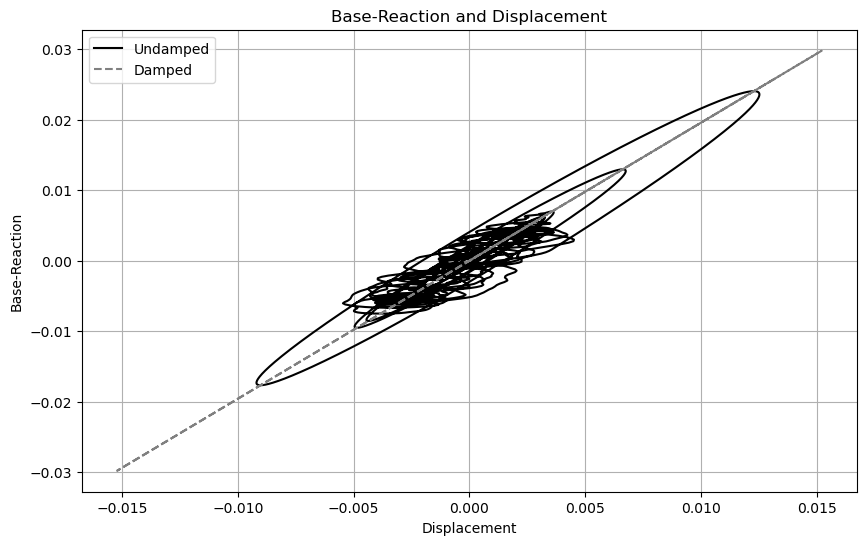

In [17]:
### BASE REACTION & DISPALCEMENT:
X1, Y1 = base_reaction_damped, displacement_damped
X2, Y2 = base_reaction_undamped, displacement_undamped
XLABEL = 'Displacement'
YLABEL = 'Base-Reaction'
TITLE = 'Base-Reaction and Displacement'

PLOT_2D(X1, Y1, X2, Y2, XLABEL, YLABEL, TITLE)